# Global Warming

In this project we'll look at answering some questions about global warming.

<img src="https://climate.nasa.gov/system/content_pages/main_images/1321_cc-vs-gw-vs-wx-768px.jpg"/>

Specifically:

* Is the average land temperature in the world really rising?
* Is it more noticable in summer or winter?
* How is global warming different in different countries

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [225]:
global1=pd.read_csv('../datasets/global_temp/GlobalTemperatures.csv')
global1.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
global1=global1[['dt','LandAverageTemperature']]
global1.dropna(inplace=True)
global1

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,2015-08-01,14.755
3188,2015-09-01,12.999
3189,2015-10-01,10.801
3190,2015-11-01,7.433


In [227]:
global1['dt'] = pd.to_datetime(global1['dt'])
global1 = global1.set_index('dt')

global1

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [228]:
# now we need to resample to get annual average temperature
annual = global1.resample("1y").mean()
annual

,LandAverageTemperature
dt,
1750-12-31,8.719364
1751-12-31,7.976143
1752-12-31,5.779833
1753-12-31,8.388083
1754-12-31,8.469333
...,...
2011-12-31,9.516000
2012-12-31,9.507333
2013-12-31,9.606500


<AxesSubplot:title={'center':'Average annual global warming'}, xlabel='dt'>

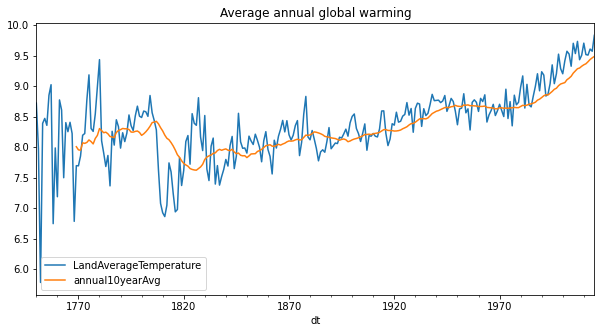

In [229]:
annual['annual10yearAvg'] = annual.LandAverageTemperature.rolling(20).mean()
annual.plot(figsize = (10,5),title="Average annual global warming")


## Comments

From this graph we can see that the average temperature is trending upwards, but it is not completely clear this is the case.  There looks like a high degree of variability in the early readings.  Perhaps this is due to missing data.

Lets look at the average temperatures in winter (december) and summer (july)

<AxesSubplot:title={'center':'Average annual global warming'}, xlabel='dt'>

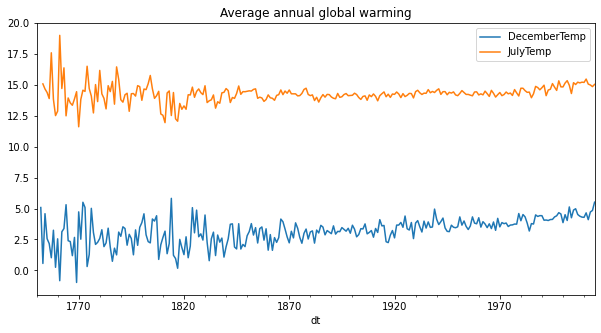

In [230]:
# select all elements in July and December

decTemp = global1[global1.index.month==12]
decTemp = decTemp.rename({"LandAverageTemperature":"DecemberTemp"}, axis=1)
decTemp = decTemp.resample("1y").first()
decTemp

julyTemp = global1[global1.index.month==7]
julyTemp = julyTemp.rename({"LandAverageTemperature":"JulyTemp"}, axis=1)
julyTemp = julyTemp.resample("1y").first()

seasonTemp = pd.concat([decTemp, julyTemp], axis=1)
seasonTemp

seasonTemp.plot(figsize = (10,5),title="Average annual global warming")


<AxesSubplot:title={'center':'Average annual global warming'}, xlabel='dt'>

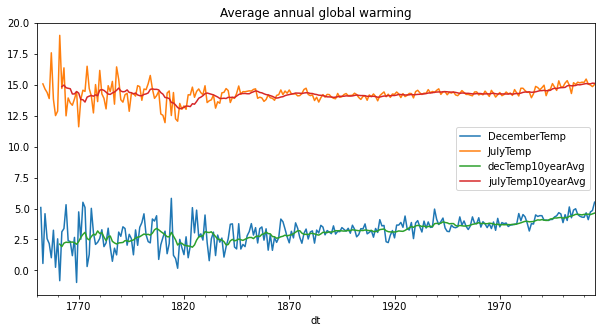

In [231]:
seasonTemp['decTemp10yearAvg'] = seasonTemp.DecemberTemp.rolling(10).mean()
seasonTemp['julyTemp10yearAvg'] = seasonTemp.JulyTemp.rolling(10).mean()
seasonTemp.plot(figsize = (10,5),title="Average annual global warming")

lines are slowly trending upward, but it seems less so.  Perhaps this is because we're dropping a lot of data contributing to the average temperature for a given year across seasons?

# Temperature by country

We can also get the land temperature by country.  Lets see if we can plot the land temperatures using a map.  

In [232]:
!pip install geopandas

You should consider upgrading via the '/Users/mike/.virtualenvs/ds1-analytics/bin/python -m pip install --upgrade pip' command.


In [233]:
import geopandas

In [234]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [235]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

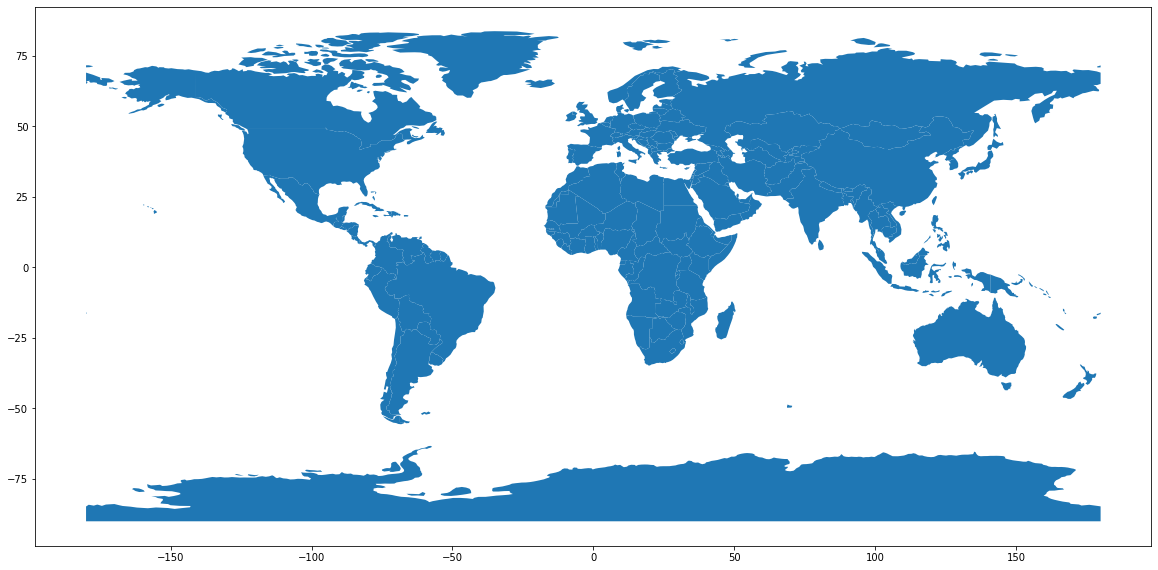

In [236]:
world.plot(figsize=(20,20))

Attempt to reproduce this with country name map, etc.. but for global temp.
Create an interactive map with a slider [ipywidgets](https://colab.research.google.com/github/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Using%20Interact.ipynb#scrollTo=Nwm1m14xB5fD)

Refs:

https://in.springboard.com/blog/time-series-analysis-interactive-time-series-maps-for-covid-19-spread/

https://stackoverflow.com/questions/16253060/how-to-convert-country-names-to-iso-3166-1-alpha-2-values-using-python


In [237]:
country_temps=pd.read_csv('../datasets/global_temp/GlobalLandTemperaturesByCountry.csv')

In [238]:
country_temps

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [239]:
#country_temps = country_temps.fillna(0)
country_temps.dt = pd.to_datetime(country_temps.dt)
# country_temps = country_temps.set_index('dt')
country_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


In [240]:
country_temps

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [241]:
# see what the country names are that are used.
data_countries = country_temps.Country.unique()
data_countries

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [242]:
#check against world map data.  They are different.  We need a way to convert themn
world_countries = np.sort(world.name.unique())

In [243]:
# differences = list(set(data_countries).symmetric_difference(world_countries))
# differences = np.sort(differences)

differences = np.setxor1d(data_countries, world_countries)
np.sort(differences)

array(['Africa', 'American Samoa', 'Andorra', 'Anguilla',
       'Antigua And Barbuda', 'Aruba', 'Asia', 'Bahrain', 'Baker Island',
       'Barbados', 'Bonaire, Saint Eustatius And Saba',
       'Bosnia And Herzegovina', 'Bosnia and Herz.',
       'British Virgin Islands', 'Brunei', 'Burma', 'Cape Verde',
       'Cayman Islands', 'Central African Rep.',
       'Central African Republic', 'Christmas Island', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Curaçao', 'Czech Republic',
       'Czechia', "Côte D'Ivoire", "Côte d'Ivoire", 'Dem. Rep. Congo',
       'Denmark (Europe)', 'Dominica', 'Dominican Rep.',
       'Dominican Republic', 'Eq. Guinea', 'Equatorial Guinea', 'Europe',
       'Falkland Is.', 'Falkland Islands (Islas Malvinas)',
       'Faroe Islands', 'Federated States Of Micronesia',
       'Fr. S. Antarctic Lands', 'France (Europe)', 'French Guiana',
       'French Polynesia', 'French Southern And Antarctic Lands',
       'Gaza Strip', 'Grenada', 'Guadeloupe', 'Gu

In [244]:
# map from country names in data to world names from above list
# is there a better way?  What happens when names change?
country_map = {
    'United States':'United States of America',
    'Timor Leste':'Timor-Leste',
    'Guinea Bissau': 'Guinea-Bissau',
    "Côte D'Ivoire": "Côte d'Ivoire",
    'W. Sahara': 'Western Sahara',
    "Congo (Democratic Republic Of The)":"Congo"
}

# function to return either the country or mapped value
def map_country(country):
    mapped = country_map.get(country)
    if mapped is not None:
        return mapped
    return country

country_temps.Country = country_temps.Country.map(map_country)
# country_temps.Country.unique()

In [245]:
merged = world.merge(country_temps, left_on='name', right_on='Country')
merged = merged.sort_values('dt')

Text(0.5, 1.0, 'Average temp by country')

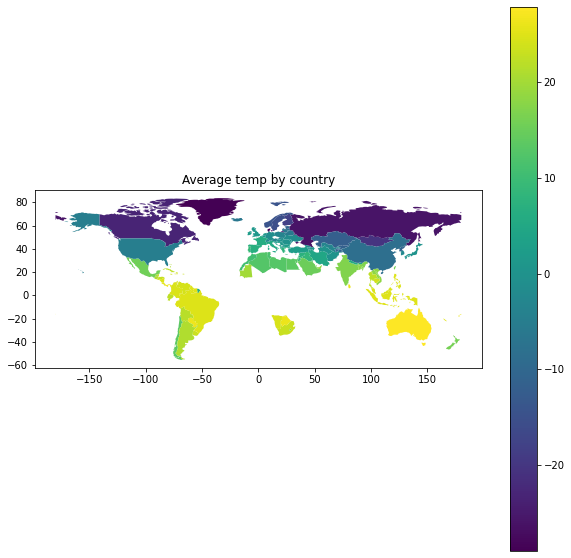

In [248]:
merged[merged.dt == pd.Timestamp(1867,1,1)].plot(column="AverageTemperature", figsize=(10,10), legend=True)
plt.title("Average temp by country")

In [249]:
import ipywidgets as widgets
from datetime import datetime

# go through each valid date and provide 
dates = merged.dt
options = [(date.strftime(' %d %b %Y '), date) for date in dates]

selection_range_slider = widgets.SelectionSlider(
    options=options,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)


In [250]:
def worldplot(date):
    dt = pd.to_datetime(date)
    merged[merged.dt==dt].plot(column='AverageTemperature',figsize=(20,9), legend = True)

widgets.interact(worldplot,date=selection_range_slider)


interactive(children=(SelectionSlider(description='Dates', layout=Layout(width='500px'), options=((' 01 Nov 17…

<function __main__.worldplot(date)>

## Comments

This map changes drastically over time, only showing countries we have data for.  In the beginning there is not as much data.  Perhaps this is an indication of why our averages are dirty.

It is hard to compare with the slider different years.  Perhaps we should also be resampling by year on a certain month to see what is happening.

Bottom line - it is not clear how to use a map visualization like this to tell us more about global warming yet.

In [251]:
country_temps = country_temps.set_index('dt')


<AxesSubplot:>

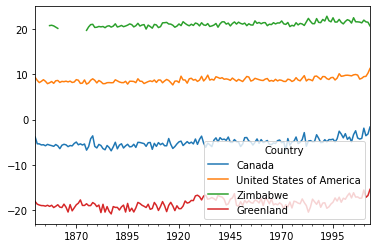

In [273]:
df = country_temps.pivot_table(index=country_temps.index.date, columns="Country", values="AverageTemperature")
# convert index to a datetime again
df.index = pd.to_datetime(df.index)
# only more recent data
df = df.loc[df.index > pd.Timestamp(1850,1,1)]

# compare a few countries
# country_list = ["Canada","United States of America","Greenland","Norway","Zimbabwe", "Nigeria", "Iceland"]]
country_list = ["Canada","United States of America", "Zimbabwe", "Greenland"]
df = df[country_list].resample("1y").mean()
df.plot()

Interesting to see the average temperature of countries.  It appears colder countries are warming up more than hot countries, but it is not obvious.  Lets view them individually.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

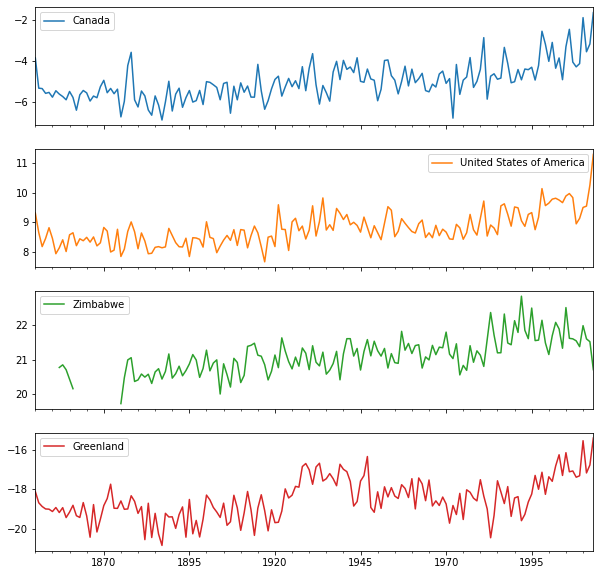

In [274]:
df.plot(figsize=(10,10), subplots=True)

When viewed this way, it looks like they are all warming up!